## Fbprophet and Multi-variate Fbprophet for TS Forecasting

### Download dataset and install libraries :

In [1]:
## Import Python Packages
!pip install yfinance
!pip install pandas_ta
!pip install pystan~=2.14
!pip install fbprophet

## Yahoo Finance offers an excellent range of market data on stocks, bonds, currencies, and cryptocurrencies. 
## It also provides news reports with various insights into different markets from around the world – all accessible through the yfinance python library.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 74 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6640071 sha256=97c6334c62e50355a7798c1d4974dd04ba47458457bddb8163c6d953daf9ff2f
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


### Import libraries :

In [2]:
import pandas_ta as ta
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date,datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Download from yfinance - Daily
def portfolio_fun_daily(tikr):
  final_df = pd.DataFrame()
  for comp in tikr:
      comp_data = yf.download(comp, start="2016-01-01", end="2022-06-23", interval="1d")
      comp_data["Symbol"]= comp
      comp_data['Date'] = comp_data.index
      comp_data = comp_data[comp_data['Close'].notna()]      
      final_df = pd.concat([final_df,comp_data])
  return(final_df)

### Consider RELIANCE Stock data :

In [4]:
#Companies =['AARTIDRUGS.NS','ACCELYA.NS','ACRYSIL.NS','ACE.NS']
Companies =['RELIANCE.NS']

RELIANCE = portfolio_fun_daily(Companies)

[*********************100%***********************]  1 of 1 completed


In [5]:
RELIANCE.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date
Date,,,,,,,,
2016-01-01,500.158997,504.666260,499.366516,502.907928,484.996368,2499742,RELIANCE.NS,2016-01-01
2016-01-04,497.781525,502.140198,488.717438,492.977081,475.419220,13923887,RELIANCE.NS,2016-01-04
2016-01-05,495.453583,500.258057,493.819092,497.855835,480.124207,6897687,RELIANCE.NS,2016-01-05
2016-01-06,499.069336,514.324707,495.503113,511.253815,493.045013,12349673,RELIANCE.NS,2016-01-06
2016-01-07,505.731171,509.173553,499.292206,501.867798,483.993286,9109980,RELIANCE.NS,2016-01-07


In [6]:
# Symbol - Name code of Stock. THis is what is listed on exchange 
# Open - Open price of Stock in a day
# High -  Highest price in a day
# Low -  Lowest price in a day
# Close - Close price in a day
# Volume -> Stock traded Volume

# Benefits of Stock Predictions

- It provides business firms and trade agencies the opportunity to improve investments.
- It allows the investors or online traders to peek into the reasons behind a certain market trend and understand price behaviour. 
- Access to Big Data helps mitigate possible risks in online trading and enables the investor to make precise decisions.
- Another useful application in Data analytics is the utilization of Natural Language Processing (NLP). Using NLP computers can analyze and learn from unstructured data and texts. 



# Different Use-Cases 
- Portfolio Management 
- Trading Automation 

In [7]:
# Libraries you need - 
# - Sklearn 
# - Pandas 
# - Numpy 
# - Matplotlib 
# - Plotly 
# - datetime, calendar 
# - FBprophet

In [8]:
# if you get error while installing fbprophet, follow this - 
# pip install -r https://raw.githubusercontent.com/facebook/prophet/master/python/requirements.txt
# pip install fbprophet==0.7.1
# pip install pystan
# conda install -c conda-forge fbprophet
#https://stackoverflow.com/questions/50808322/prophet-fbprophet-package-in-python

### Import other libraries and setting display options : 

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline
import datetime as dt
import calendar
import warnings
warnings.simplefilter('ignore')
import math
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
# plt.style.use('fivethirtyeight')
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation
from datetime import date, datetime, time, timedelta
from dateutil.relativedelta import relativedelta
import datetime as dt

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Visualise data :

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02140faa10>,
      dtype=object)

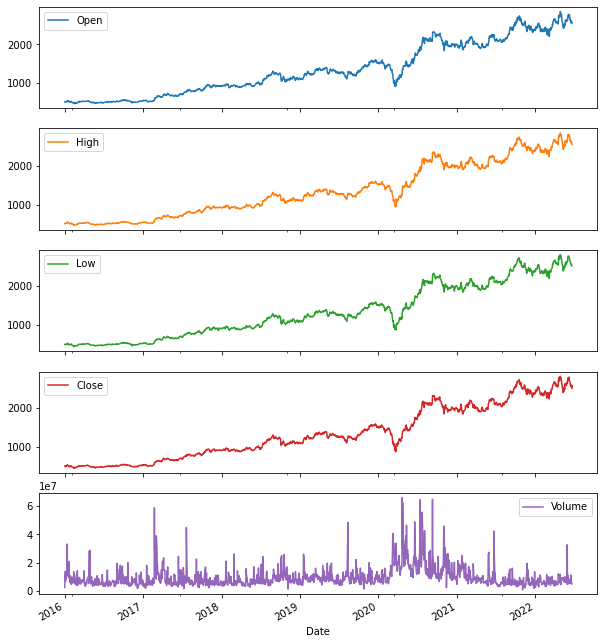

In [12]:
# Visualise data : 
visual_data = RELIANCE[[ 'Open', 'High', 'Low',
       'Close','Volume']]
visual_data.plot(subplots=True, figsize=(10,12))

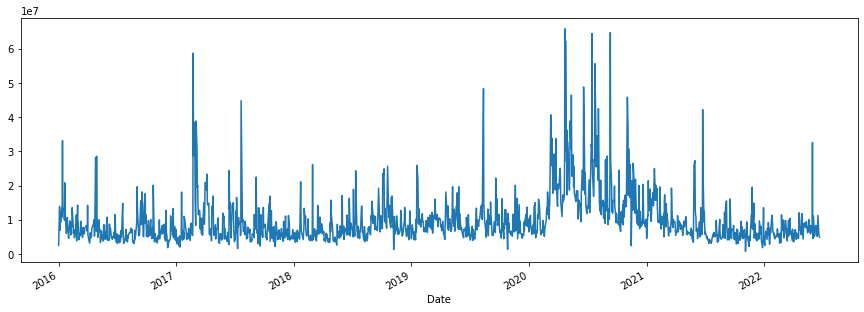

In [11]:
visual_data['Volume'].plot(figsize=(15,5))

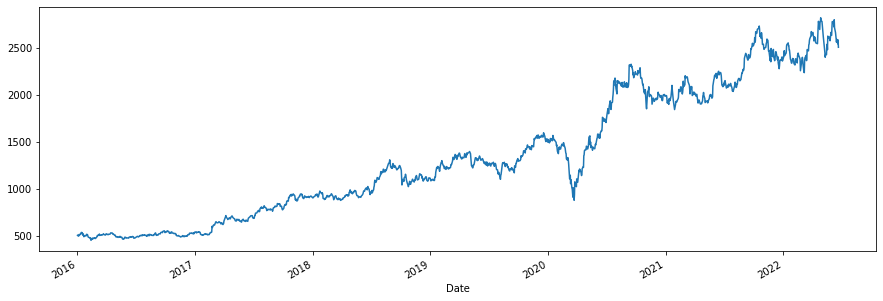

In [13]:
visual_data['Close'].plot(figsize=(15,5))

In [14]:
visual_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-01,500.159,504.666,499.367,502.908,2499742
2016-01-04,497.782,502.140,488.717,492.977,13923887
2016-01-05,495.454,500.258,493.819,497.856,6897687
2016-01-06,499.069,514.325,495.503,511.254,12349673
2016-01-07,505.731,509.174,499.292,501.868,9109980


## Forecast quality metrics

Before we begin forecasting, let's understand how to measure the quality of our predictions and take a look at the most commonly used metrics.

In [15]:
# remove other metrics - keep rmse and mae 

- [R squared](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination): coefficient of determination (in econometrics, this can be interpreted as the percentage of variance explained by the model), $(-\infty, 1]$

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ 

```python
sklearn.metrics.r2_score
```
---
- [Mean Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error): this is an interpretable metric because it has the same unit of measurment as the initial series, $[0, +\infty)$

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error): again, an interpretable metric that is particularly interesting because it is robust to outliers, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Mean Squared Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): the most commonly used metric that gives a higher penalty to large errors and vice versa, $[0, +\infty)$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- [Mean Squared Logarithmic Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error): practically, this is the same as MSE, but we take the logarithm of the series. As a result, we give more weight to small mistakes as well. This is usually used when the data has exponential trends, $[0, +\infty)$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

```python
sklearn.metrics.mean_squared_log_error
```
---
- Mean Absolute Percentage Error: this is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management, $[0, +\infty)$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

## Moving Average

Let's start with a naive hypothesis: "tomorrow will be the same as today". However, instead of a model like $\hat{y}_{t} = y_{t-1}$ (which is actually a great baseline for any time series prediction problems and sometimes is impossible to beat), we will assume that the future value of our variable depends on the average of its $k$ previous values. Therefore, we will use the **moving average**.

$\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k}_{n=1} y_{t-n}$

In [16]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])


moving_average(RELIANCE['Close'], 10)  # prediction for the last observed day (eg. past 10 days)

2618.305029296875

Unfortunately, we cannot make predictions far in the future - in order to get the value for the next step, we need the previous values to be actually observed. But moving average has another use case - smoothing the original time series to identify trends. Pandas has an implementation available with [`DataFrame.rolling(window).mean()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html). The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.

In [17]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
        
        1.96 is the approximate value of the 97.5 percentile point of the standard normal distribution. 
        95% of the area under a normal curve

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

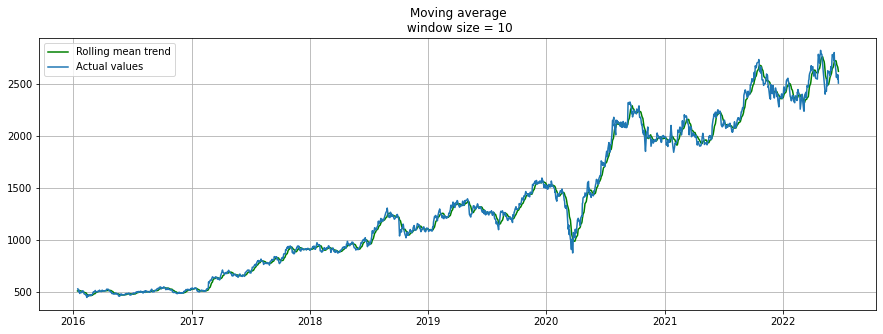

In [18]:
plotMovingAverage(RELIANCE['Close'], 10,plot_intervals=False)

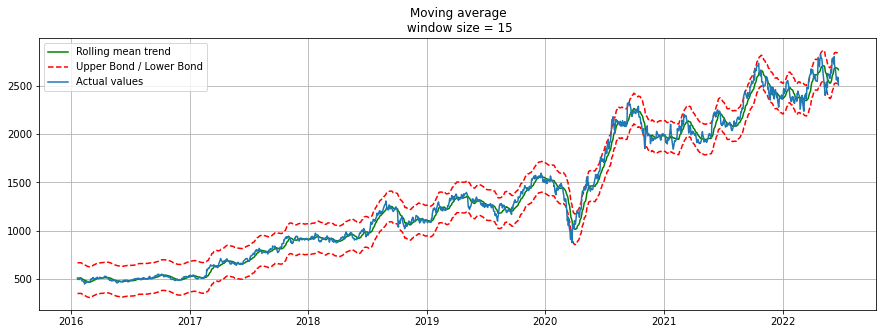

In [19]:
plotMovingAverage(RELIANCE['Close'], 15, plot_intervals=True)

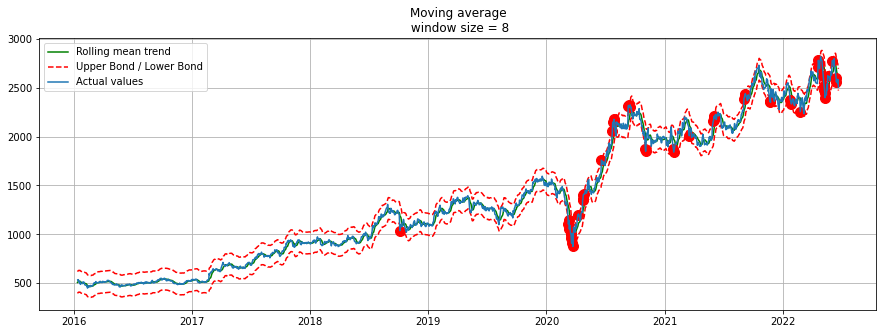

In [20]:
plotMovingAverage(RELIANCE[['Close']], 8, plot_intervals=True, plot_anomalies=True)

**Weighted average** is a simple modification to the moving average. The weights sum up to `1` with larger weights assigned to more recent observations.


$\hat{y}_{t} = \displaystyle\sum^{k}_{n=1} \omega_n y_{t+1-n}$

In [21]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n - 1] * weights[n]
    return float(result)

In [22]:
weighted_average(RELIANCE['Close'], [0.7, 0.2, 0.1]) # last three stock values are weigted

2525.045092773438

In [23]:
# just checking
0.7 * RELIANCE['Close'].iloc[-1] + 0.2 * RELIANCE['Close'].iloc[-2] + 0.1 * RELIANCE['Close'].iloc[-3]

2525.045092773438

## Temporal Split and Series Decompostion

Training and evaluating machine learning models usually require a training set and a test set. In most cases, train and test splitting is done randomly by taking 20% of the data as test data, unseen by the model and using the rest for training.


When dealing with time-related and dynamically changing environments, where the characteristics of the environment change throughout time, it is best to use time-based splitting to provide statistically robust model evaluation and best simulate real-life scenarios. For this we should use time-based cross validation, a method taken from the time-series field, which forms a type of “sliding window” training approach.

![link text](https://miro.medium.com/max/558/1*AXRu72CV1hdjLfODFGbMWQ.png)


This approach is well known in the time-series domain, where we have a signal which is a sequence taken at successive equally spaced points in time.

## Exponential smoothing

Now, let's see what happens if, instead of weighting the last $k$ values of the time series, we start weighting all available observations while exponentially decreasing the weights as we move further back in time. There exists a formula for **[exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)** that will help us with this:

$$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1} $$

Here the model value is a weighted average between the current true value and the previous model values. The $\alpha$ weight is called a smoothing factor. It defines how quickly we will "forget" the last available true observation. The smaller $\alpha$ is, the more influence the previous observations have and the smoother the series is.

Exponentiality is hidden in the recursiveness of the function – we multiply by $(1-\alpha)$ each time, which already contains a multiplication by $(1-\alpha)$ of previous model values.

In [24]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

In [25]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context("seaborn-white"):
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(
                exponential_smoothing(series, alpha), label="Alpha {}".format(alpha)
            )
        plt.plot(series.values, "c", label="Actual")
        plt.legend(loc="best")
        plt.axis("tight")
        plt.title("Exponential Smoothing")
        plt.grid(True);

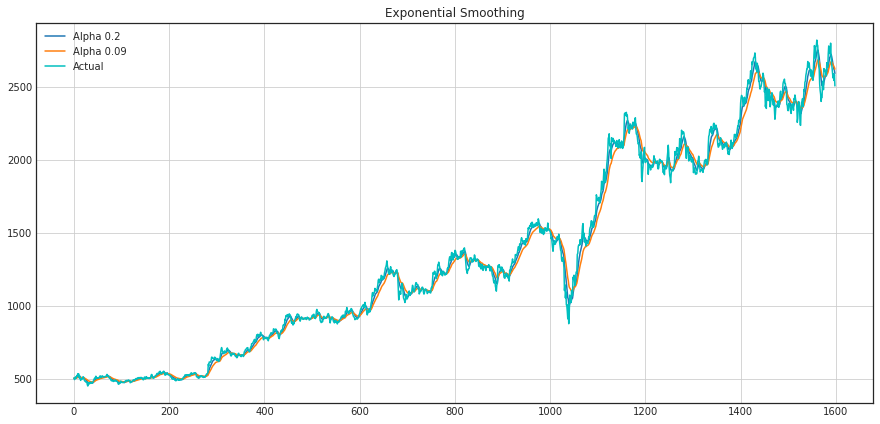

In [ ]:
plotExponentialSmoothing(RELIANCE['Close'], [0.2, 0.09])

# Modeling through FbProphet 

## Introduction

According to the [article](https://facebook.github.io/prophet/) on Facebook Research, Prophet was initially developed for the purpose of creating high quality business forecasts. This library tries to address the following difficulties common to many business time series:
- Seasonal effects caused by human behavior: weekly, monthly and yearly cycles, dips and peaks on public holidays.
- Changes in trend due to new products and market events.
- Outliers.

The authors claim that, even with the default settings, in many cases, their library produces forecasts as accurate as those delivered by experienced analysts.

Moreover, Prophet has a number of intuitive and easily interpretable customizations that allow gradually improving the quality of the forecasting model. What is especially important, these paramaters are quite comprehensible even for non-experts in time series analysis, which is a field of data science requiring certain skill and experience.

By the way, the original article is called "Forecasting at Scale", but it is not about the scale in the "usual" sense, that is addressing computational and infrastructure problems of a large number of working programs. According to the authors, Prophet should scale well in the following 3 areas:
- Accessibility to a wide audience of analysts, possibly without profound expertise in time series.
- Applicability to a wide range of distinct forecasting problems.
- Automated performance estimation of a large number of forecasts including flagging of potential problems for their subsequent inspection by the analyst.

## The Prophet Forecasting Model

Now, let's take a closer look at how Prophet works. In its essence, this library utilizes the [additive regression model](https://en.wikipedia.org/wiki/Additive_model) $y(t)$ comprising the following components:

$$y(t) = g(t) + s(t) + h(t) + \epsilon_{t},$$

where:
* Trend $g(t)$ models non-periodic changes.
* Seasonality $s(t)$ represents periodic changes.
* Holidays component $h(t)$ contributes information about holidays and events.

Below, we will consider some important properties of these model components.

### Trend

The Prophet library implements two possible trend models for $g(t)$.

The first one is called *Nonlinear, Saturating Growth*. It is represented in the form of the [logistic growth model](https://en.wikipedia.org/wiki/Logistic_function):

$$g(t) = \frac{C}{1+e^{-k(t - m)}},$$

where:
* $C$ is the carrying capacity (that is the curve's maximum value).
* $k$ is the growth rate (which represents "the steepness" of the curve).
* $m$ is an offset parameter.

This logistic equation allows modelling non-linear growth with saturation, that is when the growth rate of a value decreases with its growth. One of the typical examples would be representing the growth of the audience of an application or a website.

Actually, $C$ and $k$ are not necessarily constants and may vary over time. Prophet supports both automatic and manual tuning of their variability. The library can itself choose optimal points of trend changes by fitting the supplied historical data. 

Also, Prophet allows analysts to manually set changepoints of the growth rate and capacity values at different points in time. For instance, analysts may have insights about dates of past releases that prominently influenced some key product indicators.

The second trend model is a simple *Piecewise Linear Model* with a constant rate of growth. It is best suited for problems without saturating growth.

### Seasonality

The seasonal component $s(t)$ provides a flexible model of periodic changes due to weekly and yearly seasonality.

Weekly seasonal data is modeled with dummy variables. Six new variables are added: `monday`, `tuesday`, `wednesday`, `thursday`, `friday`, `saturday`, which take values 0 or 1 depending on the day of the week. The feature `sunday` is not added because it would be a linear combination of the other days of the week, and this fact would have an adverse effect on the model.

Yearly seasonality model in Prophet relies on Fourier series.

Since [version 0.2](https://github.com/facebook/prophet) you can also use *sub-daily time series* and make *sub-daily forecasts* as well as employ the new *daily seasonality* feature.

### Holidays and Events

The component $h(t)$ represents predictable abnormal days of the year including those on irregular schedules, e.g., Black Fridays.

To utilize this feature, the analyst needs to provide a custom list of events.

### Error

The error term $\epsilon(t)$ represents information that was not reflected in the model. Usually it is modeled as normally distributed noise.

### Prophet Benchmarking

For a detailed description of the model and algorithms behind Prophet refer to the paper ["Forecasting at scale"](https://peerj.com/preprints/3190/) by Sean J. Taylor and Benjamin Letham.

The authors also compared their library with several other methods for time series forecasting. They used [Mean Absolute Percentage Error (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) as a measure of prediction accuracy. In this research, Prophet has shown substantially lower forecasting error than the other models.

![link text](https://github.com/Yorko/mlcourse.ai/blob/main/img/topic9_benchmarking_prophet.png?raw=true)

In [26]:
final_data = RELIANCE[['Close']].dropna().drop_duplicates()

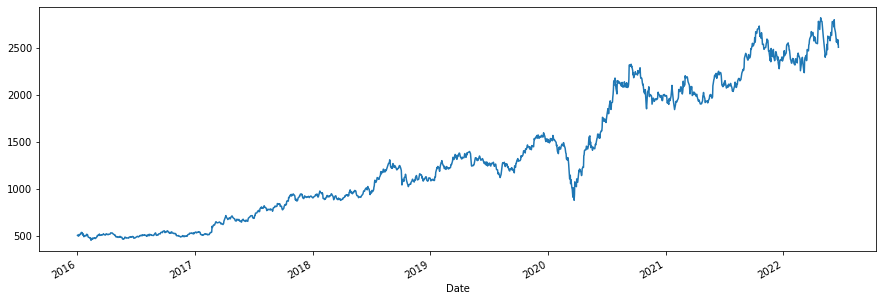

In [27]:
final_data['Close'].plot(figsize=(15,5))

Let's convert our dataframe to the format required by Prophet:

In [28]:
final_data = final_data.reset_index()
final_data.columns = ["ds", "y"]
final_data.tail()

,ds,y
1554,2022-06-16,2560.000
1555,2022-06-17,2590.000
1556,2022-06-20,2543.050
1557,2022-06-21,2584.100
1558,2022-06-22,2505.600


The authors of the library generally advise to make predictions based on at least several months, ideally, more than a year of historical data. Luckily, in our case we have more than a couple of years of data to fit the model.

To measure the quality of our forecast, we need to split our dataset into the *historical part*, which is the first and biggest slice of our data, and the *prediction part*, which will be located at the end of the timeline. We will remove the last month from the dataset in order to use it later as a prediction target:

In [29]:
prediction_size = 30
train_df = final_data[:-prediction_size]
train_df.tail(n=3)

,ds,y
1526,2022-05-09,2518.300
1527,2022-05-10,2474.650
1528,2022-05-11,2449.300


Now we need to create a new `Prophet` object. Here we can pass the parameters of the model into the constructor. But in this example we will use the defaults. Then we train our model by invoking its `fit` method on our training dataset:

In [30]:
stock_model = Prophet()
stock_model.fit(train_df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Using the helper method `Prophet.make_future_dataframe`, we create a dataframe which will contain all dates from the history and also extend into the future for those 30 days that we left out before.

In [31]:
future = stock_model.make_future_dataframe(periods=prediction_size)
future.tail(n=5)

,ds
1554,2022-06-06
1555,2022-06-07
1556,2022-06-08
1557,2022-06-09
1558,2022-06-10


We predict values with `Prophet` by passing in the dates for which we want to create a forecast. If we also supply the historical dates (as in our case), then in addition to the prediction we will get an in-sample fit for the history. Let's call the model's `predict` method with our `future` dataframe as an input:

In [32]:
forecast = stock_model.predict(future)
forecast.tail(n=10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1549,2022-06-01,2645.457,2489.799,2718.208,2645.180,2645.919,-42.784,-42.784,-42.784,5.200,5.200,5.200,-47.984,-47.984,-47.984,0.000,0.000,0.000,2602.673
1550,2022-06-02,2646.822,2491.801,2731.862,2646.355,2647.513,-36.060,-36.060,-36.060,7.960,7.960,7.960,-44.019,-44.019,-44.019,0.000,0.000,0.000,2610.762
1551,2022-06-03,2648.187,2486.982,2733.232,2647.602,2649.070,-35.416,-35.416,-35.416,4.588,4.588,4.588,-40.004,-40.004,-40.004,0.000,0.000,0.000,2612.771
1552,2022-06-04,2649.552,2438.553,2682.572,2648.772,2650.755,-87.086,-87.086,-87.086,-51.074,-51.074,-51.074,-36.011,-36.011,-36.011,0.000,0.000,0.000,2562.466
1553,2022-06-05,2650.917,2523.711,2753.620,2649.867,2652.396,-10.616,-10.616,-10.616,21.500,21.500,21.500,-32.116,-32.116,-32.116,0.000,0.000,0.000,2640.301
1554,2022-06-06,2652.282,2511.796,2752.196,2651.173,2654.049,-23.054,-23.054,-23.054,5.333,5.333,5.333,-28.387,-28.387,-28.387,0.000,0.000,0.000,2629.228
1555,2022-06-07,2653.647,2517.368,2759.701,2652.471,2655.646,-18.397,-18.397,-18.397,6.494,6.494,6.494,-24.891,-24.891,-24.891,0.000,0.000,0.000,2635.249
1556,2022-06-08,2655.012,2519.398,2763.160,2653.518,2657.171,-16.491,-16.491,-16.491,5.200,5.200,5.200,-21.691,-21.691,-21.691,0.000,0.000,0.000,2638.520
1557,2022-06-09,2656.377,2518.008,2764.063,2654.748,2658.904,-10.880,-10.880,-10.880,7.960,7.960,7.960,-18.840,-18.840,-18.840,0.000,0.000,0.000,2645.496
1558,2022-06-10,2657.741,2525.987,2768.028,2655.635,2660.738,-11.796,-11.796,-11.796,4.588,4.588,4.588,-16.384,-16.384,-16.384,0.000,0.000,0.000,2645.946


In the resulting dataframe you can see many columns characterizing the prediction, including trend and seasonality components as well as their confidence intervals. The forecast itself is stored in the `yhat` column.

The Prophet library has its own built-in tools for visualization that enable us to quickly evaluate the result.

First, there is a method called `Prophet.plot` that plots all the points from the forecast:

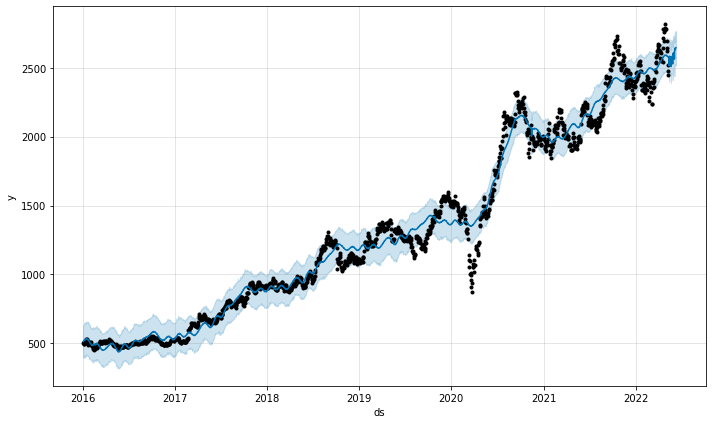

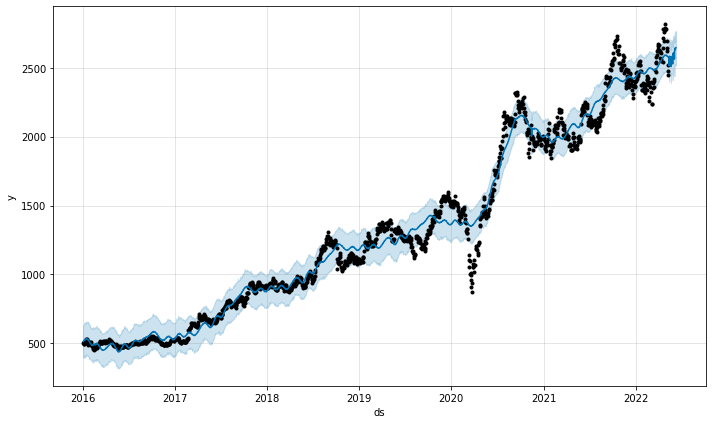

In [33]:
stock_model.plot(forecast)

# Black Dots --> Data used to train the model 
# Blue Line --> Line fitting through Data or Predictions based on learning 
# Blue Haze --> uncertainty intervals of predictions; lower the better 

The second function `Prophet.plot_components` might be useful in our case. It allows us to observe different components of the model separately: trend, yearly and weekly seasonality. In addition, if you supply information about holidays and events to your model, they will also be shown in this plot.


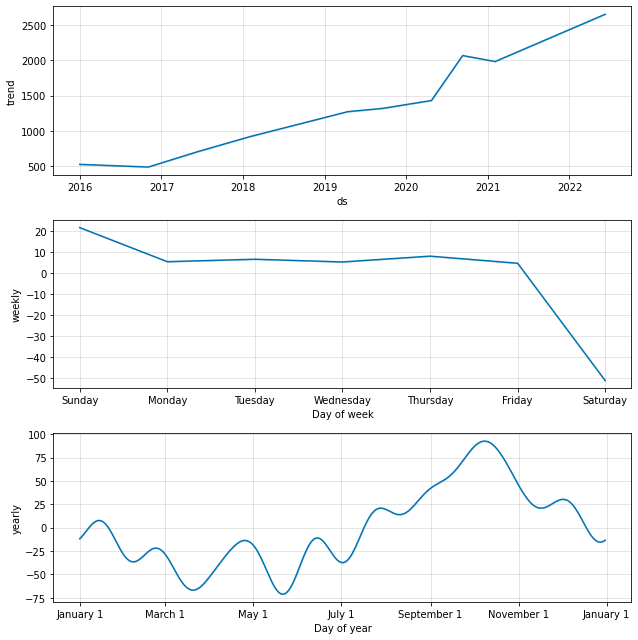

In [34]:
stock_model.plot_components(forecast);

Let's evaluate the quality of the algorithm by calculating the error metrics for the last 30 days that we predicted. For this, we will need the observations $y_i$ and the corresponding predicted values $\hat{y}_i$.

## Automatic changepoint detection in Prophet

Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible. Consider the Peyton Manning forecast from the Quickstart. By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

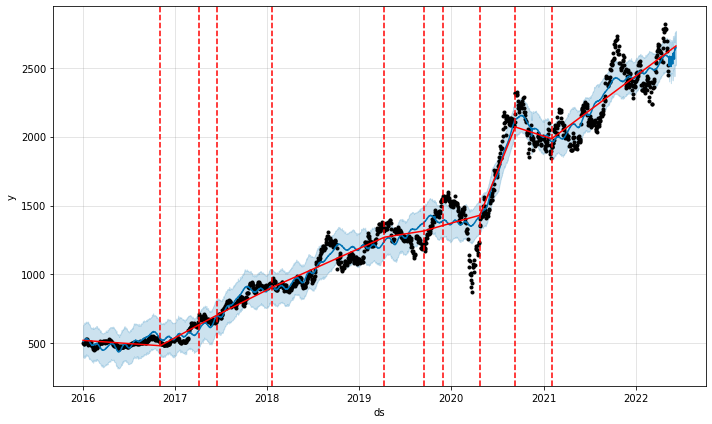

In [35]:
from fbprophet.plot import add_changepoints_to_plot
fig = stock_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),stock_model,forecast)

Even though we have a lot of places where the rate can possibly change, because of the sparse prior, most of these changepoints go unused. We can see this by plotting the magnitude of the rate change at each changepoint:

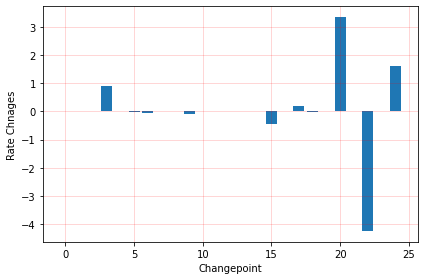

In [36]:
deltas = stock_model.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)),deltas)
ax.grid(True,which='major',c='red',ls='-',alpha=0.2)
ax.set_ylabel('Rate Chnages')
ax.set_xlabel('Changepoint')
fig.tight_layout()
#Prophet plots around 25 chnage points

We can see that this dataframe contains all the information we need except for the historical values. We need to join the `forecast` object with the actual values `y` from the original dataset `df`. For this we will define a helper function that we will reuse later:

In [37]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
        historical.set_index("ds")
    )

In [38]:
final_data.tail()

,ds,y
1554,2022-06-16,2560.000
1555,2022-06-17,2590.000
1556,2022-06-20,2543.050
1557,2022-06-21,2584.100
1558,2022-06-22,2505.600


In [39]:
cmp_df = make_comparison_dataframe(final_data, forecast)
cmp_df.tail(n=10)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2022-06-01,2602.673,2489.799,2718.208,2633.500
2022-06-02,2610.762,2491.801,2731.862,2724.300
2022-06-03,2612.771,2486.982,2733.232,2779.500
2022-06-04,2562.466,2438.553,2682.572,NaN
2022-06-05,2640.301,2523.711,2753.620,NaN
2022-06-06,2629.228,2511.796,2752.196,2767.550
2022-06-07,2635.249,2517.368,2759.701,2772.750
2022-06-08,2638.520,2519.398,2763.160,2724.050
2022-06-09,2645.496,2518.008,2764.063,2798.750


We are also going to define a helper function that we will use to gauge the quality of our forecasting with MAPE and MAE error measures:

In [40]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """

    # Make a copy
    df = df.copy()

    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df["e"] = df["y"] - df["yhat"]
    df["p"] = 100 * df["e"] / df["y"]

    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model.

    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]

    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {"MAPE": error_mean("p"), "MAE": error_mean("e")}

In [41]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 3.1338369573319538
MAE 82.08744165948366


## MultiVariate Prophet : Energy Consumption Time Series Prediction 

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read CSV file, and convert hourly data into daily level

In [43]:
##  Information
data = pd.read_csv('/content/drive/MyDrive/Temp/Auto TS Session/Session1/energy_consumption.csv')
data['timeStamp']= pd.to_datetime(data['timeStamp'])
data.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.500,0.000,46.130
1,2012-01-01 01:00:00,4752.100,0.000,45.890
2,2012-01-01 02:00:00,4542.600,0.000,45.040
3,2012-01-01 03:00:00,4357.700,0.000,45.030
4,2012-01-01 04:00:00,4275.500,0.000,42.610


In [44]:
ny_df =data.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f020effdb50>,
      dtype=object)

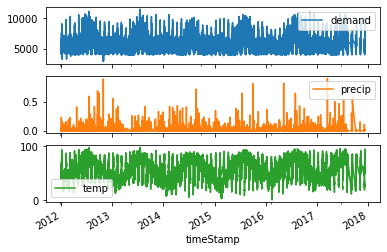

In [45]:
ny_df.plot(subplots = True)

In [46]:
ny_df_daily = ny_df.resample('D').mean()


ny_df_daily['demand']= ny_df_daily['demand'].fillna(method = 'ffill')
ny_df_daily['temp']= ny_df_daily['temp'].fillna(method = 'ffill')
ny_df_daily['precip']= ny_df_daily['precip'].fillna(method = 'ffill')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0215605050>,
      dtype=object)

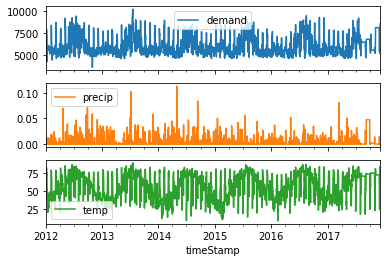

In [47]:
ny_df_daily.plot(subplots = True)

Rename Column Name

In [48]:
ny_df_final = ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')
ny_df_final['month']= ny_df_final['ds'].dt.month
ny_df_final.head(2)

,ds,y,temp,month
0,2012-01-01,4954.833,46.510,1
1,2012-01-02,5679.600,54.011,1


In [49]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp              
         min   mean    max
month                     
1     12.346 42.682 82.625
2      9.015 44.517 83.435
3     14.156 47.644 81.569
4     18.350 55.195 82.320
5     19.624 61.296 85.390
6     19.310 66.067 86.917
7      9.508 69.057 89.607
8     14.295 67.511 87.426
9     18.108 63.053 84.449
10    20.011 58.760 81.687
11    21.412 52.558 84.355
12    19.751 47.537 84.272

In [50]:
def summer_temp(temp):
  if temp>80:
    return 1
  else:
    return 0

ny_df_final['summer_temp'] = ny_df_final['temp'].apply(summer_temp)
ny_df_final['month_bins'] = pd.cut(ny_df_final['month'],bins=3,labels=False)

In [51]:
ny_df_final.head()

,ds,y,temp,month,summer_temp,month_bins
0,2012-01-01,4954.833,46.510,1,0,0
1,2012-01-02,5679.600,54.011,1,0,0
2,2012-01-03,5834.229,39.535,1,0,0
3,2012-01-04,4936.050,45.922,1,0,0
4,2012-01-05,5616.142,57.983,1,0,0


Train and Test Split

In [52]:
train = ny_df_final[(ny_df_final['ds']>='2012-01-01') & (ny_df_final['ds']<='2017-04-30')]
test = ny_df_final[(ny_df_final['ds']>'2017-04-30')]

In [53]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [55]:
future['summer_temp']=ny_df_final['summer_temp']
future['month_bins']=ny_df_final['month_bins']


forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,6641.358,5183.409,8038.822
2047,2017-08-09,6689.037,5250.657,8046.736
2048,2017-08-10,6676.232,5311.549,8098.214
2049,2017-08-11,6664.616,5375.969,8042.584
2050,2017-08-12,6279.722,4878.350,7660.615


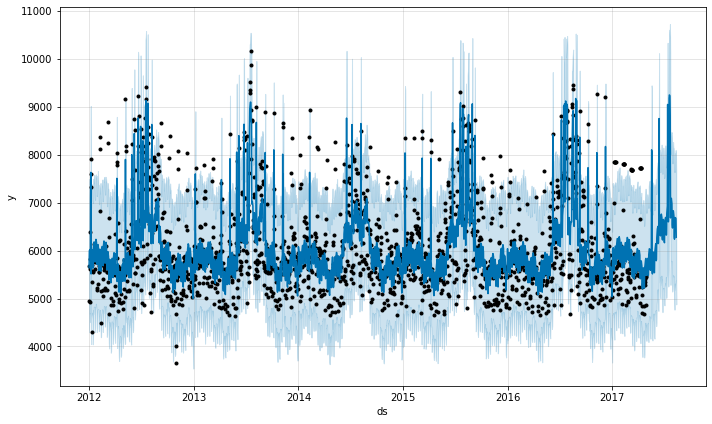

In [56]:
fig1 = m.plot(forecast)
#95% Confidence interval is the light blue color
#the black dots are actual values 
#the dark blue is the y_hat or forecasted value

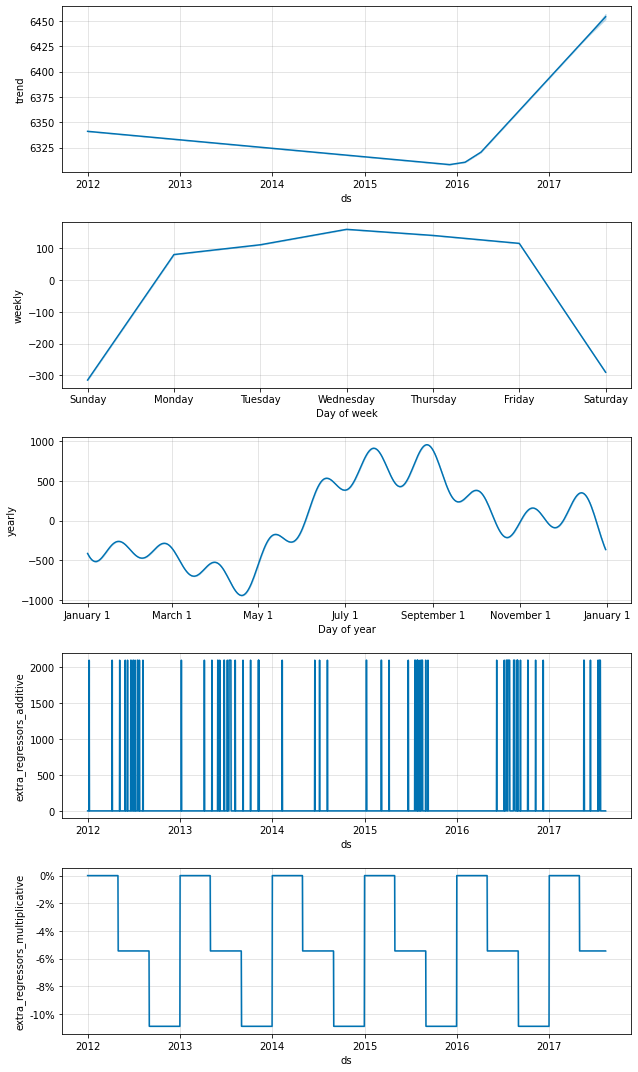

In [57]:
fig2 = m.plot_components(forecast)

In [58]:
from fbprophet.diagnostics import cross_validation,performance_metrics
cv_results = cross_validation(model = m,initial = '731 days',horizon='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,574516.751,757.969,578.390,0.097,0.084,0.929
1,37 days 00:00:00,588746.818,767.298,585.884,0.098,0.084,0.925
2,37 days 12:00:00,590114.233,768.189,586.865,0.098,0.084,0.929
3,38 days 00:00:00,608688.374,780.185,594.620,0.099,0.084,0.923
4,38 days 12:00:00,622813.609,789.185,601.573,0.099,0.085,0.912
5,39 days 00:00:00,629565.675,793.452,603.635,0.099,0.084,0.907
6,39 days 12:00:00,628001.311,792.465,603.381,0.099,0.084,0.907
7,40 days 00:00:00,637400.871,798.374,614.076,0.101,0.087,0.907
8,40 days 12:00:00,650914.209,806.793,623.589,0.103,0.089,0.901
9,41 days 00:00:00,652292.529,807.646,625.979,0.103,0.090,0.901


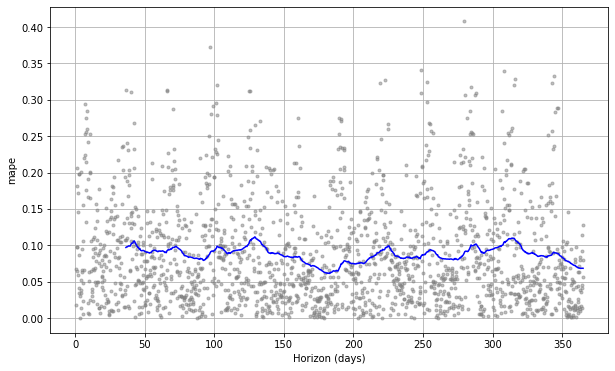

In [59]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results,metric='mape')

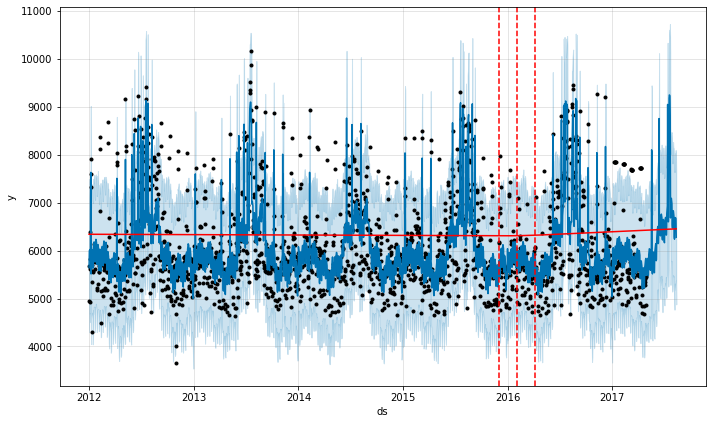

In [60]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

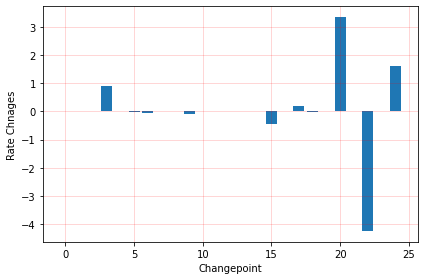

In [61]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)),deltas)
ax.grid(True,which='major',c='red',ls='-',alpha=0.2)
ax.set_ylabel('Rate Chnages')
ax.set_xlabel('Changepoint')
fig.tight_layout()
#Prophet plots around 25 chnage points